## Breast Cancer classification using CNN <hr>

## Selected Topics in SWE - CNN Projcet for image classification <hr>

In [37]:
# importing 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [38]:
import tensorflow as tf
from tensorflow import keras
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
# from keras.layers.normalization import BatchNormalization
#from keras.layers.advanced_activations import LeakyReLU

In [39]:
# Loading data directory
data_dir = 'Dataset_BUSI_with_GT'

In [40]:
# Working on 128 * 128 images, batch = 32 images each
batch_size = 32
img_height = 128
img_width = 128

In [41]:
# Training data -> 80%
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 780 files belonging to 3 classes.
Using 624 files for training.


In [42]:
# Validation data -> 20%
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 780 files belonging to 3 classes.
Using 156 files for validation.


In [43]:
# Printing& storing classs names 'labels' to use later.
class_names = train_ds.class_names
print(class_names)

['benign', 'malignant', 'normal']


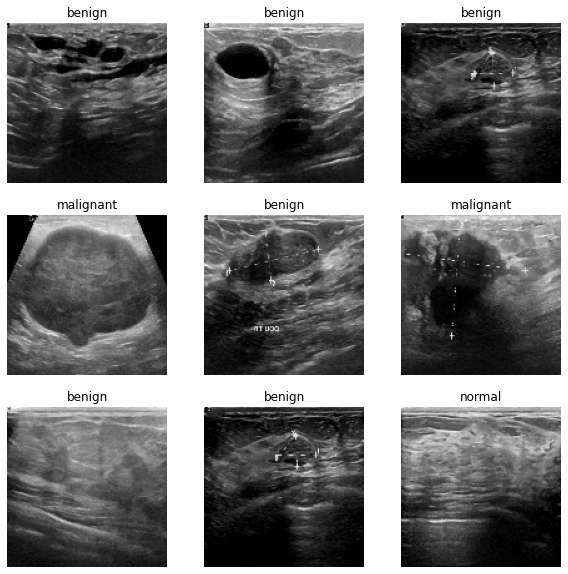

In [44]:
# Showing the first 9 images in training data
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [45]:
# get batch of 32 images shape
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32,)


In [46]:
# Configrations for more performance, keeping images in memory, just for my Potato PC :')
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [47]:
# Normalizing images Dim. 'RGB -> 255 ==> [0 : 1]'
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [48]:
# Start normalization on training dataset
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0060968143 0.9665303


In [49]:
# Building CNN model using Conv2D 
num_classes = len(class_names)

model = Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [50]:
# Compiling 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [51]:
# Printing model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 64)       

In [52]:
# Fitting data into model

epochs=10

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
20/20 [==============================] - 17s 644ms/step - loss: 1.0734 - accuracy: 0.5240 - val_loss: 0.9294 - val_accuracy: 0.6090
Epoch 2/10
20/20 [==============================] - 10s 478ms/step - loss: 0.9600 - accuracy: 0.5497 - val_loss: 0.8959 - val_accuracy: 0.6795
Epoch 3/10
20/20 [==============================] - 9s 475ms/step - loss: 0.8440 - accuracy: 0.6170 - val_loss: 0.7531 - val_accuracy: 0.7115
Epoch 4/10
20/20 [==============================] - 10s 482ms/step - loss: 0.7138 - accuracy: 0.7067 - val_loss: 0.7045 - val_accuracy: 0.7051
Epoch 5/10
20/20 [==============================] - 10s 481ms/step - loss: 0.6385 - accuracy: 0.7404 - val_loss: 0.8472 - val_accuracy: 0.5962
Epoch 6/10
20/20 [==============================] - 10s 490ms/step - loss: 0.5255 - accuracy: 0.7821 - val_loss: 0.7690 - val_accuracy: 0.7179
Epoch 7/10
20/20 [==============================] - 10s 520ms/step - loss: 0.4173 - accuracy: 0.8381 - val_loss: 0.7568 - val_accuracy: 0.7500


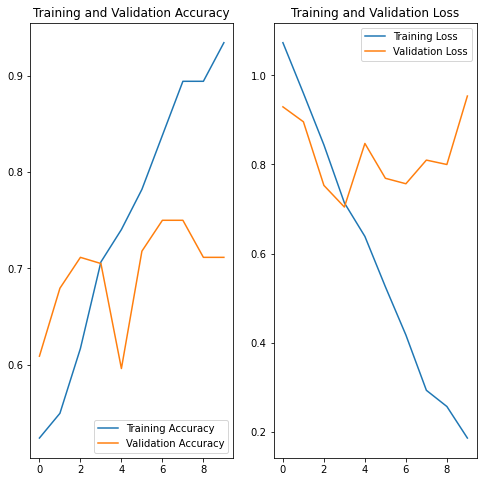

In [53]:
#Playing with subplot Visualizer, Accuracy vs Loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

 ### plot showes there's a dropp off, so we will use drop-out technique trying to get better results.

In [54]:
# data augmentation, 
data_augmentation = keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
  ]
)

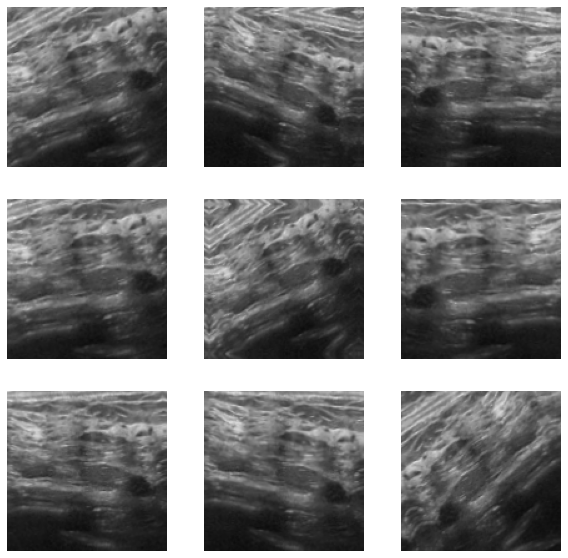

In [55]:
# Showing how data agumentation affects the same image
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [56]:
# new model using Dropout
model = Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
 tf.keras.layers.Dense(num_classes)
])

In [57]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                 

In [59]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
20/20 [==============================] - 15s 667ms/step - loss: 1.0620 - accuracy: 0.5016 - val_loss: 0.9613 - val_accuracy: 0.6090
Epoch 2/15
20/20 [==============================] - 11s 534ms/step - loss: 0.9841 - accuracy: 0.5481 - val_loss: 0.8758 - val_accuracy: 0.6090
Epoch 3/15
20/20 [==============================] - 11s 542ms/step - loss: 0.9421 - accuracy: 0.5513 - val_loss: 0.8368 - val_accuracy: 0.6154
Epoch 4/15
20/20 [==============================] - 12s 631ms/step - loss: 0.9080 - accuracy: 0.5946 - val_loss: 0.8012 - val_accuracy: 0.6795
Epoch 5/15
20/20 [==============================] - 12s 602ms/step - loss: 0.8757 - accuracy: 0.6090 - val_loss: 0.7656 - val_accuracy: 0.6923
Epoch 6/15
20/20 [==============================] - 12s 605ms/step - loss: 0.8482 - accuracy: 0.6554 - val_loss: 0.8193 - val_accuracy: 0.6923
Epoch 7/15
20/20 [==============================] - 11s 529ms/step - loss: 0.8067 - accuracy: 0.6458 - val_loss: 0.7884 - val_accuracy: 0.6859

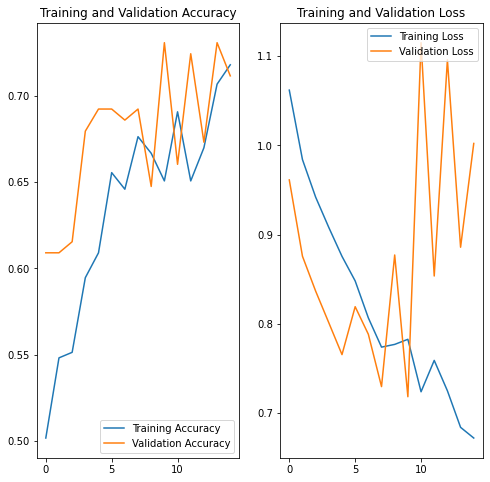

In [60]:
# Plotting again to see new results visualized:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()